# Sklearn
Материал взят из репозитория https://github.com/emeli-dral/sklearn_intro

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Генерация данных

In [4]:
blobs = datasets.make_blobs(centers=2, cluster_std=3.5, random_state=1)

In [5]:
blobs[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

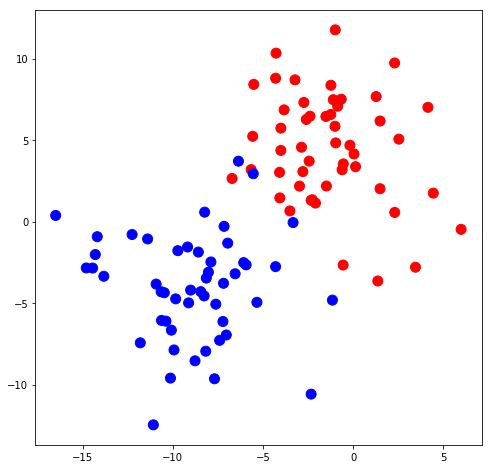

In [6]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0],
                                                                                    blobs[1], 
                                                                                    test_size=0.3,
                                                                                    random_state=1)

### Линейная классификация

#### RidgeClassifier

In [8]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [9]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [10]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [11]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [12]:
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


In [13]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.9666666666666667

In [14]:
print('Intercept', ridge_classifier.intercept_ )
print('Coefficients', ridge_classifier.coef_)

Intercept [-0.50073421]
Coefficients [[-0.11164518 -0.0925014 ]]


####  Нарисуем границу принятия решения нашим классификатором

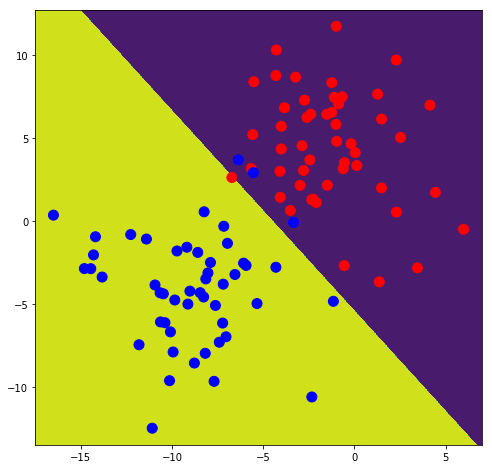

In [15]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, ridge_classifier, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

#### LogisticRegression

In [16]:
log_regressor = linear_model.LogisticRegression(random_state=0)

In [17]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
lr_predictions = log_regressor.predict(test_data)

In [19]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [20]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [21]:
print(lr_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [22]:
print(lr_proba_predictions)

[[9.99964463e-01 3.55366566e-05]
 [6.59642915e-01 3.40357085e-01]
 [7.01850415e-01 2.98149585e-01]
 [4.73762142e-05 9.99952624e-01]
 [9.29085437e-01 7.09145630e-02]
 [4.01441241e-01 5.98558759e-01]
 [9.99279239e-01 7.20760967e-04]
 [9.97629335e-01 2.37066452e-03]
 [9.92246873e-01 7.75312694e-03]
 [3.08558342e-03 9.96914417e-01]
 [9.87109827e-01 1.28901728e-02]
 [8.29682548e-05 9.99917032e-01]
 [9.70073741e-01 2.99262589e-02]
 [8.71244984e-04 9.99128755e-01]
 [1.98341812e-05 9.99980166e-01]
 [3.57517290e-06 9.99996425e-01]
 [3.86966857e-01 6.13033143e-01]
 [9.87062765e-01 1.29372353e-02]
 [3.75421731e-01 6.24578269e-01]
 [3.01514496e-06 9.99996985e-01]
 [1.60068448e-01 8.39931552e-01]
 [9.99675824e-01 3.24175856e-04]
 [9.98353859e-01 1.64614060e-03]
 [1.38720505e-02 9.86127949e-01]
 [1.19762927e-05 9.99988024e-01]
 [7.53815726e-05 9.99924618e-01]
 [9.13128097e-03 9.90868719e-01]
 [9.70277465e-01 2.97225346e-02]
 [9.99238510e-01 7.61490100e-04]
 [2.30124217e-05 9.99976988e-01]]


In [23]:
print(metrics.roc_auc_score(test_labels, lr_predictions))

0.8888888888888888


In [24]:
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

1.0


In [25]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8666666666666667


In [26]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.9666666666666667


In [27]:
print('Intercept', log_regressor.intercept_ )
print('Coefficient', log_regressor.coef_)

Intercept [-1.79188992]
Coefficient [[-0.78280739 -0.68391652]]


####  Нарисуем границу принятия решения нашим классификатором

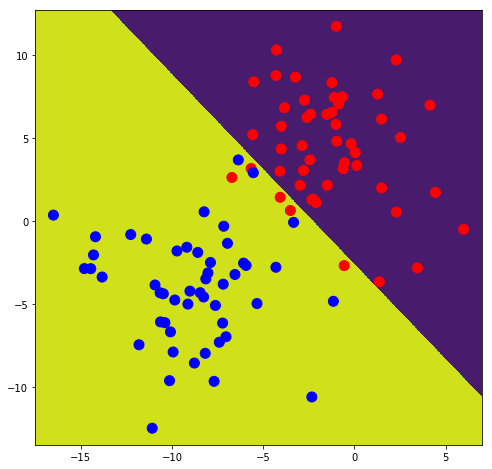

In [28]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

### Оценка качества по cross-validation

#### cross_val_score

In [29]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier,
                                                blobs[0],
                                                blobs[1],
                                                scoring='accuracy',
                                                cv=10)

In [30]:
lr_scoring = model_selection.cross_val_score(log_regressor,
                                             blobs[0],
                                             blobs[1],
                                             scoring='accuracy',
                                             cv=10)

In [31]:
ridge_scoring

array([1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9, 0.9])

In [32]:
lr_scoring

array([0.8, 1. , 1. , 1. , 1. , 1. , 0.8, 1. , 0.9, 0.9])

In [33]:
print('Ridge mean:{}, max:{}, min:{}, std:{:2f}'.format(ridge_scoring.mean(),
                                                        ridge_scoring.max(),
                                                        ridge_scoring.min(),
                                                        ridge_scoring.std()))

Ridge mean:0.9700000000000001, max:1.0, min:0.9, std:0.045826


In [34]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),
                                                   lr_scoring.max(), 
                                                   lr_scoring.min(),
                                                   lr_scoring.std()))

Log mean:0.9400000000000001, max:1.0, min:0.8, std:0.07999999999999999


#### cross_val_score с заданными scorer и cv_strategy

In [35]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [36]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20,
                                                     test_size=0.3,
                                                     random_state=2)

In [37]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier,
                                                blobs[0],
                                                blobs[1],
                                                scoring=scorer,
                                                cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [38]:
lr_scoring = model_selection.cross_val_score(log_regressor,
                                             blobs[0],
                                             blobs[1],
                                             scoring=scorer,
                                             cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [39]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(),
                                                     ridge_scoring.max(), 
                                                     ridge_scoring.min(),
                                                     ridge_scoring.std()))

Ridge mean:0.958333333333333, max:1.0, min:0.9, std:0.02763853991962833


In [40]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),
                                                   lr_scoring.max(), 
                                                   lr_scoring.min(), 
                                                   lr_scoring.std()))

Log mean:0.9499999999999998, max:1.0, min:0.8666666666666667, std:0.03574601764921202
